## Imports:

In [1]:
#%% Imports

# Basic Imports 
import numpy as np
import pandas as pd

# Plotting Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from networkx import DiGraph
import networkx as nx
import statistics
from itertools import permutations
from itertools import combinations #no longer being used
from IPython import display

# Relabeled Dataset:

In [2]:
df = pd.read_csv('relabeledDataset.csv')
df

,diseaseNID,geneNID,propagatedAssociationType,ogAssociationTypes
0,1317,1088,AlteredExpression,{'AlteredExpression'}
1,1338,1088,AlteredExpression,{'AlteredExpression'}
2,1741,1088,AlteredExpression,{'AlteredExpression'}
3,2107,1088,PosttranslationalModification,{'PosttranslationalModification'}
4,2592,1088,AlteredExpression,{'AlteredExpression'}
...,...,...,...,...
1202259,29239,20075,Biomarker,{'Biomarker'}
1202260,29280,20163,Biomarker,{'Biomarker'}
1202261,29341,20169,Biomarker,{'Biomarker'}
1202262,29763,9527,Biomarker,{'Biomarker'}


In [3]:
#Checking For Missing Values:
df.isnull().sum()

diseaseNID                   0
geneNID                      0
propagatedAssociationType    0
ogAssociationTypes           0
dtype: int64

In [3]:
df['propagatedAssociationType'].unique()

array(['AlteredExpression', 'PosttranslationalModification',
       'GenomicAlterations', 'Therapeutic', 'Biomarker'], dtype=object)

## Dataset with diseaseNID, geneNID, and propagatedAssociationType:

In [3]:
threeCol = df.drop(columns = 'ogAssociationTypes')
threeCol

,diseaseNID,geneNID,propagatedAssociationType
0,1317,1088,AlteredExpression
1,1338,1088,AlteredExpression
2,1741,1088,AlteredExpression
3,2107,1088,PosttranslationalModification
4,2592,1088,AlteredExpression
...,...,...,...
1202259,29239,20075,Biomarker
1202260,29280,20163,Biomarker
1202261,29341,20169,Biomarker
1202262,29763,9527,Biomarker


In [4]:
# Dataset with diseaseNID, associationType, and log of Counts of Genes per Disease by Association Type:
logSumDisease = threeCol.groupby(by = ['diseaseNID', 'propagatedAssociationType']).size().sort_values(ascending=False).reset_index(name = 'Counts of Genes per Disease by Association Type')
logSumDisease

,diseaseNID,propagatedAssociationType,Counts of Genes per Disease by Association Type
0,2107,AlteredExpression,6792
1,431,AlteredExpression,4855
2,13959,AlteredExpression,4526
3,13536,AlteredExpression,4103
4,2104,AlteredExpression,3861
...,...,...,...
54200,20457,GenomicAlterations,1
54201,9067,GenomicAlterations,1
54202,9067,PosttranslationalModification,1
54203,20454,GenomicAlterations,1


In [5]:
logSumDisease['Log of Counts of Genes per Disease by Association Type'] = np.log10(logSumDisease['Counts of Genes per Disease by Association Type'])
logSumDisease

,diseaseNID,propagatedAssociationType,Counts of Genes per Disease by Association Type,Log of Counts of Genes per Disease by Association Type
0,2107,AlteredExpression,6792,3.831998
1,431,AlteredExpression,4855,3.686189
2,13959,AlteredExpression,4526,3.655715
3,13536,AlteredExpression,4103,3.613102
4,2104,AlteredExpression,3861,3.586700
...,...,...,...,...
54200,20457,GenomicAlterations,1,0.000000
54201,9067,GenomicAlterations,1,0.000000
54202,9067,PosttranslationalModification,1,0.000000
54203,20454,GenomicAlterations,1,0.000000


## Boxplot of Counts of Genes per Disease for each Association Type:

<AxesSubplot:xlabel='Counts of Genes per Disease by Association Type', ylabel='propagatedAssociationType'>

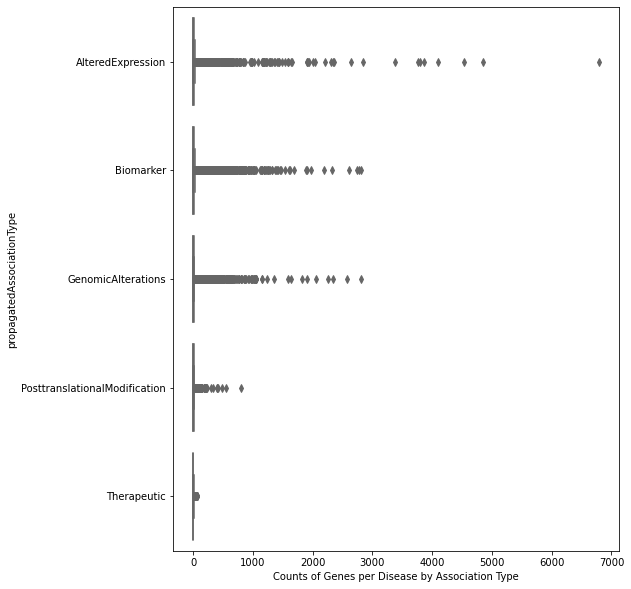

In [6]:
fig, ax = plt.subplots(figsize = (8,10))
sns.boxplot(y = 'propagatedAssociationType', x = 'Counts of Genes per Disease by Association Type',
                 data = logSumDisease, palette="Set3", orient = 'h')

## Boxplot of Log of Counts of Genes per Disease for each Association Type:

<AxesSubplot:xlabel='Log of Counts of Genes per Disease by Association Type', ylabel='propagatedAssociationType'>

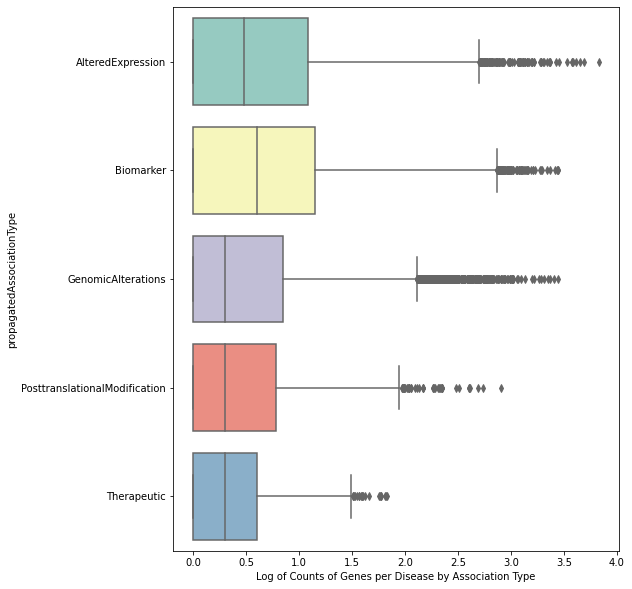

In [7]:
fig, ax = plt.subplots(figsize = (8,10))
sns.boxplot(y = 'propagatedAssociationType', x = 'Log of Counts of Genes per Disease by Association Type',
                 data = logSumDisease, palette="Set3", orient = 'h')

**FIGURE OUT WHAT THIS BOXPLOT IS SHOWING YOU**

In [8]:
# Dataset with Fraction of Genes for a Disease per Association Type:
logSumDisease2 = threeCol.groupby(by = ['diseaseNID']).size().sort_values(ascending=False).reset_index(name = 'Counts of Diseases')
result = logSumDisease.merge(logSumDisease2)
result['Ratio'] = result['Counts of Genes per Disease by Association Type']/result['Counts of Diseases']
result

,diseaseNID,propagatedAssociationType,Counts of Genes per Disease by Association Type,Log of Counts of Genes per Disease by Association Type,Counts of Diseases,Ratio
0,2107,AlteredExpression,6792,3.831998,13020,0.521659
1,2107,GenomicAlterations,2802,3.447468,13020,0.215207
2,2107,Biomarker,2609,3.416474,13020,0.200384
3,2107,PosttranslationalModification,802,2.904174,13020,0.061598
4,2107,Therapeutic,15,1.176091,13020,0.001152
...,...,...,...,...,...,...
54200,9065,Therapeutic,1,0.000000,1,1.000000
54201,9066,Therapeutic,1,0.000000,1,1.000000
54202,20457,GenomicAlterations,1,0.000000,1,1.000000
54203,20454,GenomicAlterations,1,0.000000,1,1.000000


## Boxplot of Fraction of Genes for a Disease per Association Type:

<AxesSubplot:xlabel='Ratio', ylabel='propagatedAssociationType'>

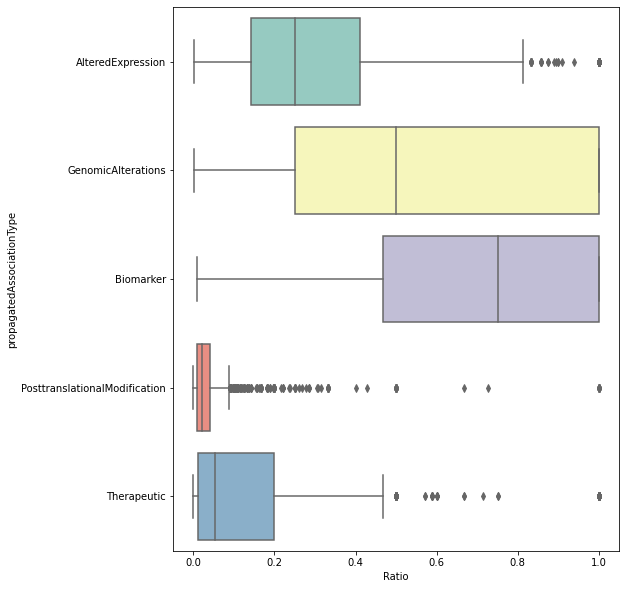

In [9]:
fig, ax = plt.subplots(figsize = (8,10))
sns.boxplot(y = 'propagatedAssociationType', x = 'Ratio',
                 data = result, palette="Set3", orient = 'h')

**FIGURE OUT WHAT THIS BOXPLOT IS SHOWING YOU**

## Gene Comparison and Exploration:

In [4]:
# Creating Gene Sets for Each Association Type Based on Disease:
a = threeCol.groupby(by = ['diseaseNID', 'propagatedAssociationType'])['geneNID'].apply(lambda x: set(x))
a = a.reset_index()
a

,diseaseNID,propagatedAssociationType,geneNID
0,1,Biomarker,"{1088, 3070}"
1,2,Biomarker,{10721}
2,3,Biomarker,"{522, 525, 7694, 5650, 5139, 11283, 12826, 156..."
3,3,GenomicAlterations,"{4711, 6417, 5458, 1813, 3065, 17182}"
4,4,Biomarker,"{8402, 2627}"
...,...,...,...
54200,30291,GenomicAlterations,{5241}
54201,30292,AlteredExpression,"{3833, 11963, 2493, 270}"
54202,30292,Biomarker,"{18471, 46, 19792, 632, 1115, 1436, 2111, 3551}"
54203,30292,GenomicAlterations,"{2403, 1738, 9805, 270, 6738, 3829, 4057}"


In [5]:
# Creating Sets of association Types Based on Disease
a2 = a.groupby(by = ['diseaseNID'])['propagatedAssociationType'].apply(lambda x: set(x))
a2 = a2.to_frame().reset_index()
a2

,diseaseNID,propagatedAssociationType
0,1,{Biomarker}
1,2,{Biomarker}
2,3,"{Biomarker, GenomicAlterations}"
3,4,{Biomarker}
4,5,"{Biomarker, AlteredExpression, GenomicAlterati..."
...,...,...
30165,30289,{GenomicAlterations}
30166,30290,{GenomicAlterations}
30167,30291,{GenomicAlterations}
30168,30292,"{Biomarker, AlteredExpression, GenomicAlterati..."


In [6]:
# Creating the Different Possible Combinations of Association Types for Each Disease:
from itertools import product
a2['permutations'] = a2['propagatedAssociationType'].apply(lambda r: list(product(r,repeat = 2)))

In [7]:
# Removing the Diseases that Only Hold One Association Type:
a3 = a2[a2['permutations'].map(lambda d: len(d)) > 0]
a3

,diseaseNID,propagatedAssociationType,permutations
0,1,{Biomarker},"[(Biomarker, Biomarker)]"
1,2,{Biomarker},"[(Biomarker, Biomarker)]"
2,3,"{Biomarker, GenomicAlterations}","[(Biomarker, Biomarker), (Biomarker, GenomicAl..."
3,4,{Biomarker},"[(Biomarker, Biomarker)]"
4,5,"{Biomarker, AlteredExpression, GenomicAlterati...","[(Biomarker, Biomarker), (Biomarker, AlteredEx..."
...,...,...,...
30165,30289,{GenomicAlterations},"[(GenomicAlterations, GenomicAlterations)]"
30166,30290,{GenomicAlterations},"[(GenomicAlterations, GenomicAlterations)]"
30167,30291,{GenomicAlterations},"[(GenomicAlterations, GenomicAlterations)]"
30168,30292,"{Biomarker, AlteredExpression, GenomicAlterati...","[(Biomarker, Biomarker), (Biomarker, AlteredEx..."


In [8]:
# Making a Separate Row for Each Combination:
resultGE = pd.DataFrame([(c, tup.diseaseNID) for tup in a3.itertuples() for c in tup.permutations])
resultGE = resultGE.rename(columns={0: 'Combos', 1: 'diseaseNID'})

In [9]:
# Separating the Created Combinations into 2 Columns:
resultGE[['associationType1','associationType2']] = pd.DataFrame(resultGE.Combos.tolist(), index= resultGE.index)

In [10]:
resultGE['geneNID1'] = np.nan
resultGE['geneNID2'] = np.nan

In [11]:
arowList = []
arow2List = []
for index, row in resultGE.iterrows():
    midrow = a.loc[(a['diseaseNID'] == row['diseaseNID']) & (a['propagatedAssociationType'] == row['associationType1'])]
    arowList.append(midrow.iloc[0]['geneNID'])
    
    midrow2 = a.loc[(a['diseaseNID'] == row['diseaseNID']) & (a['propagatedAssociationType'] == row['associationType2'])]
    arow2List.append(midrow2.iloc[0]['geneNID'])

In [12]:
resultGE['geneNID1'] = arowList
resultGE['geneNID2'] = arow2List
resultGE = resultGE.drop(columns = ['Combos'])
resultGE['jaccardIndex'] = np.nan

In [13]:
# Jaccard Similarity Coefficient/Jaccard Index Function:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [14]:
def f(x):
    return jaccard(x['geneNID1'], x['geneNID2']) 

In [15]:
resultGE['jaccardIndex'] = resultGE.apply(f, axis = 1)
resultGE

,diseaseNID,associationType1,associationType2,geneNID1,geneNID2,jaccardIndex
0,1,Biomarker,Biomarker,"{1088, 3070}","{1088, 3070}",1.0
1,2,Biomarker,Biomarker,{10721},{10721},1.0
2,3,Biomarker,Biomarker,"{522, 525, 7694, 5650, 5139, 11283, 12826, 156...","{522, 525, 7694, 5650, 5139, 11283, 12826, 156...",1.0
3,3,Biomarker,GenomicAlterations,"{522, 525, 7694, 5650, 5139, 11283, 12826, 156...","{4711, 6417, 5458, 1813, 3065, 17182}",0.0
4,3,GenomicAlterations,Biomarker,"{4711, 6417, 5458, 1813, 3065, 17182}","{522, 525, 7694, 5650, 5139, 11283, 12826, 156...",0.0
...,...,...,...,...,...,...
127828,30292,AlteredExpression,GenomicAlterations,"{3833, 11963, 2493, 270}","{2403, 1738, 9805, 270, 6738, 3829, 4057}",0.1
127829,30292,GenomicAlterations,Biomarker,"{2403, 1738, 9805, 270, 6738, 3829, 4057}","{18471, 46, 19792, 632, 1115, 1436, 2111, 3551}",0.0
127830,30292,GenomicAlterations,AlteredExpression,"{2403, 1738, 9805, 270, 6738, 3829, 4057}","{3833, 11963, 2493, 270}",0.1
127831,30292,GenomicAlterations,GenomicAlterations,"{2403, 1738, 9805, 270, 6738, 3829, 4057}","{2403, 1738, 9805, 270, 6738, 3829, 4057}",1.0


## Boxplots for Gene Exploration:

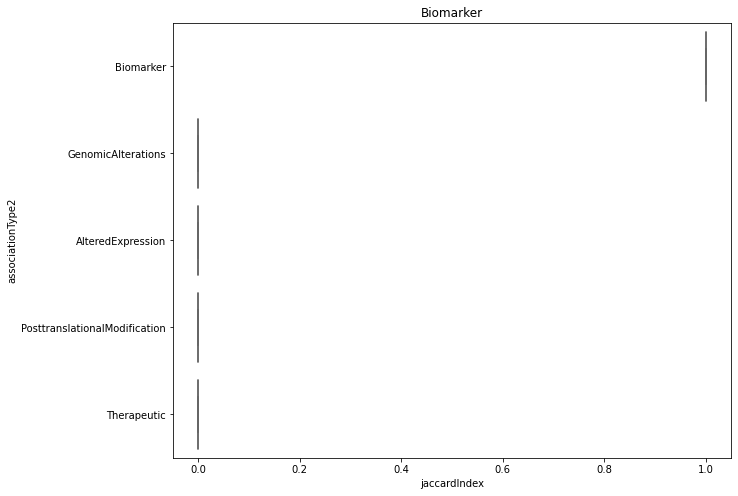

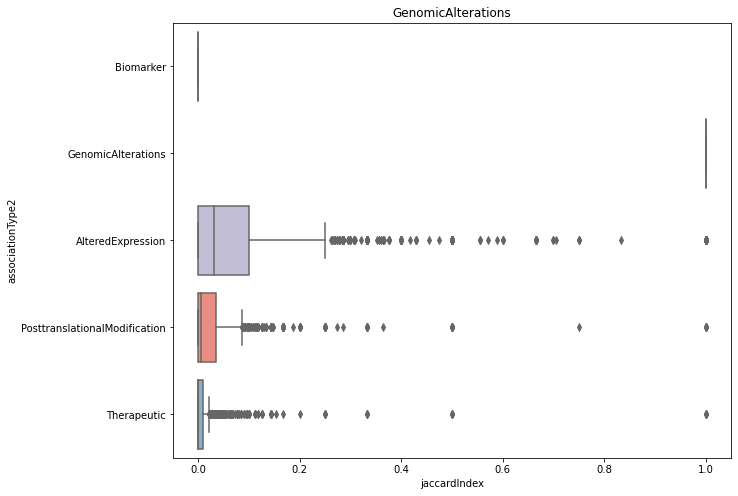

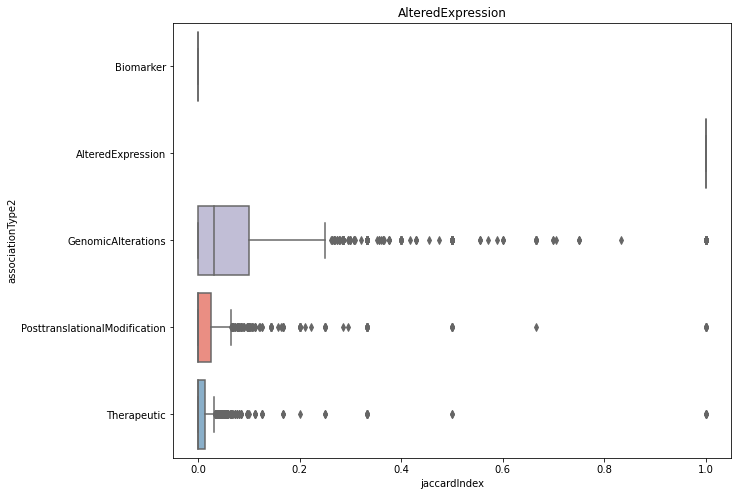

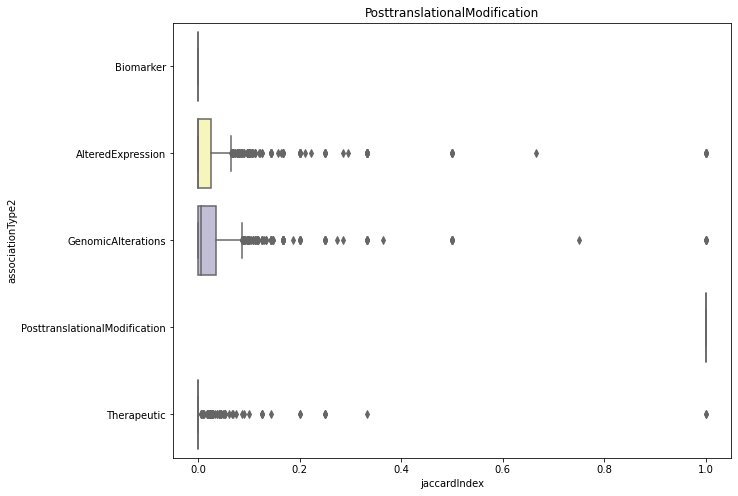

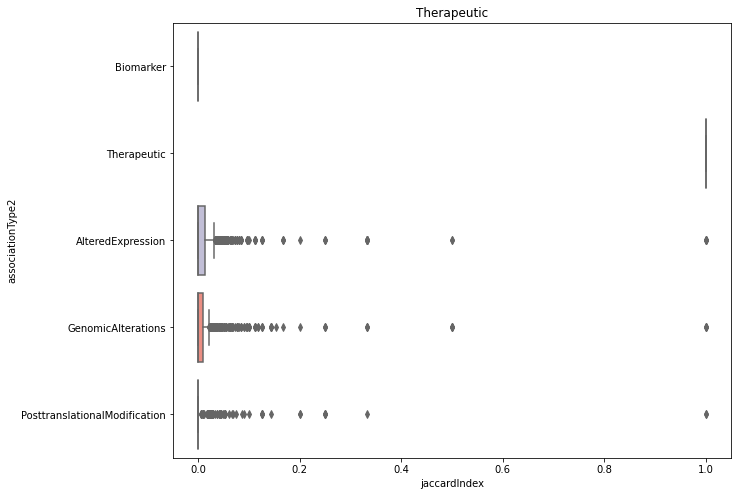

In [16]:
for i, associationType in enumerate(resultGE.associationType1.unique(), 1): #Iterating through each unique association Type
    data = resultGE[resultGE.associationType1 == associationType] #Filtering by association Type
    fig, ax = plt.subplots(figsize = (10,8))
    sns.boxplot(x = 'jaccardIndex', y = 'associationType2',
                 data = data, palette="Set3", orient = 'h')
    plt.title(associationType)

**FIGURE OUT WHAT THESE BOXPLOTS ARE SHOWING YOU**

In [17]:
# Reorganizing the Dataset to Obtain the Median Values for Each Association Type Combination:
# This new dataset will have one row for each association type combination, a set of the jaccard Indices for that association type combination, and a median of the values for each of those sets. Those median values are what will be placed in the heatmap
resultGE2 = resultGE.drop(columns = ['diseaseNID', 'geneNID1', 'geneNID2'])
resultGE2 = resultGE2.groupby(by = ['associationType1', 'associationType2'])['jaccardIndex'].apply(lambda x: list(x))
resultGE2 = resultGE2.reset_index()

In [18]:
jaccardsets = resultGE2['jaccardIndex']
medians = []
for set in jaccardsets:
    medians.append(statistics.median(set))
resultGE2['Median'] = medians
resultGE2

,associationType1,associationType2,jaccardIndex,Median
0,AlteredExpression,AlteredExpression,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000
1,AlteredExpression,Biomarker,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000
2,AlteredExpression,GenomicAlterations,"[0.0, 0.022727272727272728, 0.0857142857142857...",0.030303
3,AlteredExpression,PosttranslationalModification,"[0.0, 0.0, 0.0, 0.037440435670524165, 0.035190...",0.000000
4,AlteredExpression,Therapeutic,"[0.0, 0.016666666666666666, 0.0, 0.0, 0.002118...",0.000000
5,Biomarker,AlteredExpression,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000
6,Biomarker,Biomarker,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000
7,Biomarker,GenomicAlterations,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000
8,Biomarker,PosttranslationalModification,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000
9,Biomarker,Therapeutic,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000


## The Heatmap:
### Recategorized Dataset Heatmap with Unique Biomarker Rows Median:

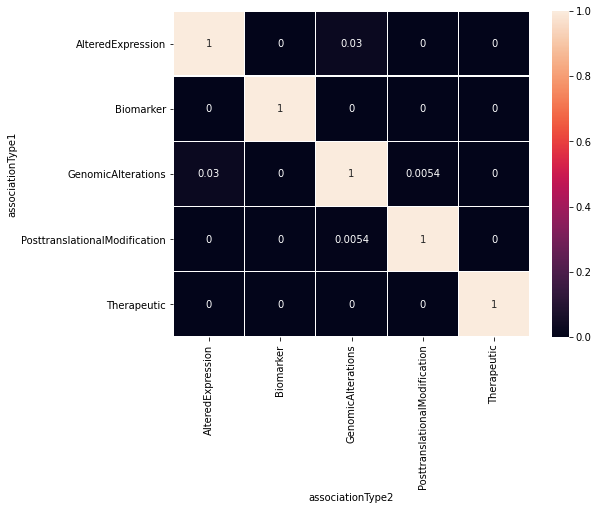

In [19]:
resultGE3 = resultGE2.pivot("associationType1", "associationType2", "Median")
fig, ax = plt.subplots(figsize=(8,6))   
ax = sns.heatmap(resultGE3, annot = True, linewidths = .25)

**FIGURE OUT WHAT THIS HEATMAP IS SHOWING YOU**

In [20]:
meansets = resultGE2['jaccardIndex']
means = []
for set in meansets:
    means.append(statistics.mean(set))
resultGE2['Mean'] = means
resultGE2

,associationType1,associationType2,jaccardIndex,Median,Mean
0,AlteredExpression,AlteredExpression,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,1.000000
1,AlteredExpression,Biomarker,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000
2,AlteredExpression,GenomicAlterations,"[0.0, 0.022727272727272728, 0.0857142857142857...",0.030303,0.079792
3,AlteredExpression,PosttranslationalModification,"[0.0, 0.0, 0.0, 0.037440435670524165, 0.035190...",0.000000,0.027549
4,AlteredExpression,Therapeutic,"[0.0, 0.016666666666666666, 0.0, 0.0, 0.002118...",0.000000,0.021436
5,Biomarker,AlteredExpression,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000
6,Biomarker,Biomarker,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,1.000000
7,Biomarker,GenomicAlterations,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000
8,Biomarker,PosttranslationalModification,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000
9,Biomarker,Therapeutic,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000


### Recategorized Dataset Heatmap with Unique Biomarker Rows Mean:

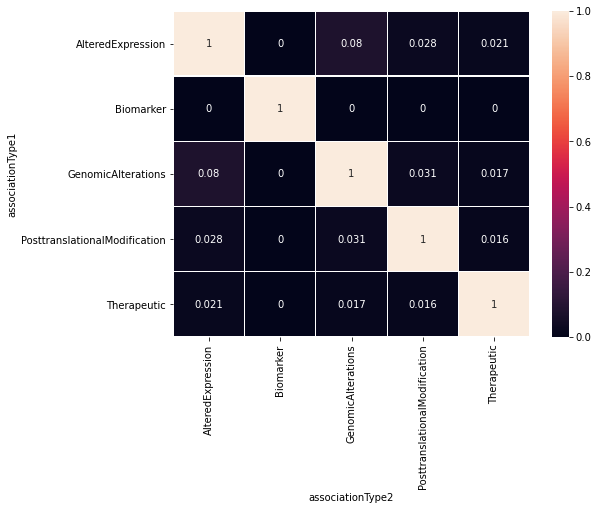

In [21]:
resultGE4 = resultGE2.pivot("associationType1", "associationType2", "Mean")
fig, ax = plt.subplots(figsize=(8,6))   
ax = sns.heatmap(resultGE4, annot = True, linewidths = .25)

In [36]:
diseaseinfo = pd.read_csv('diseaseAttributes.tsv', sep = "\t")
geneinfo = pd.read_csv('geneAttributes.tsv', sep = "\t")
geneinfo = geneinfo.drop(columns = ['pLI', 'DSI', 'DPI'])
result1 = df.merge(diseaseinfo)
combined = result1.merge(geneinfo)

In [37]:
combined

,diseaseNID,geneNID,propagatedAssociationType,ogAssociationTypes,diseaseId,diseaseName,type,geneId,geneName,geneDescription
0,1317,1088,AlteredExpression,{'AlteredExpression'},C0018939,Hematological Disease,group,1468,SLC25A10,solute carrier family 25 member 10
1,1338,1088,AlteredExpression,{'AlteredExpression'},C0019061,Hemolytic-Uremic Syndrome,disease,1468,SLC25A10,solute carrier family 25 member 10
2,1741,1088,AlteredExpression,{'AlteredExpression'},C0023467,"Leukemia, Myelocytic, Acute",disease,1468,SLC25A10,solute carrier family 25 member 10
3,2107,1088,PosttranslationalModification,{'PosttranslationalModification'},C0027651,Neoplasms,group,1468,SLC25A10,solute carrier family 25 member 10
4,2592,1088,AlteredExpression,{'AlteredExpression'},C0034155,"Purpura, Thrombotic Thrombocytopenic",disease,1468,SLC25A10,solute carrier family 25 member 10
...,...,...,...,...,...,...,...,...,...,...
1202259,16235,18787,Biomarker,{'Biomarker'},C1837418,MOYAMOYA DISEASE 3,disease,493818,MYMY3,moyamoya disease 3
1202260,17788,13392,Biomarker,{'Biomarker'},C1854002,EXUDATIVE VITREORETINOPATHY 3,disease,81864,EVR3,exudative vitreoretinopathy 3
1202261,19000,19707,Biomarker,{'Biomarker'},C1864653,"GLAUCOMA 1, OPEN ANGLE, M (disorder)",disease,777643,GLC1M,"glaucoma 1, open angle, M (juvenile-onset)"
1202262,24184,2387,Biomarker,{'Biomarker'},C3887947,HUMAN PAPILLOMAVIRUS TYPE 18 INTEGRATION SITE 1,phenotype,3260,HPV18I1,human papillomavirus (type 18) integration site 1


## Writing the Data to GMT Files:

In [21]:
gmtfiledata = a.merge(diseaseinfo)
gmtfiledata

,diseaseNID,associationType,geneNID,diseaseId,diseaseName,type
0,1,Biomarker,"{1088, 3070}",C0000727,"Abdomen, Acute",phenotype
1,2,Biomarker,{10721},C0000729,Abdominal Cramps,phenotype
2,3,Biomarker,"{522, 525, 7694, 5650, 11283, 5139, 12826, 156...",C0000731,Abdomen distended,phenotype
3,3,CausalMutation,"{3065, 5458, 1813}",C0000731,Abdomen distended,phenotype
4,3,GeneticVariation,"{6417, 17182, 4711}",C0000731,Abdomen distended,phenotype
...,...,...,...,...,...,...
67784,30291,GeneticVariation,{5241},C4757951,Desmoplastic infantile astrocytoma and ganglio...,disease
67785,30292,AlteredExpression,"{3833, 11963, 2493, 270}",C4759295,Non-metastatic prostate cancer,disease
67786,30292,Biomarker,"{18471, 1738, 9805, 46, 270, 19792, 6738, 3829...",C4759295,Non-metastatic prostate cancer,disease
67787,30292,GeneticVariation,"{2403, 1738, 9805, 270, 6738, 3829, 4057}",C4759295,Non-metastatic prostate cancer,disease


In [23]:
dfOG = dfOG.merge(geneinfo)
geneID = dfOG.groupby(by = ['diseaseNID', 'associationType'])['geneId'].apply(lambda x: set(x))
geneID = geneID.reset_index()
gmtfiledata = gmtfiledata.merge(geneID)
gmtfiledata

,diseaseNID,associationType,geneNID,diseaseId,diseaseName,type,geneId
0,1,Biomarker,"{1088, 3070}",C0000727,"Abdomen, Acute",phenotype,"{4210, 1468}"
1,2,Biomarker,{10721},C0000729,Abdominal Cramps,phenotype,{54808}
2,3,Biomarker,"{522, 525, 7694, 5650, 11283, 5139, 12826, 156...",C0000731,Abdomen distended,phenotype,"{2050, 7173, 3592, 3594, 4629, 5660, 4638, 668..."
3,3,CausalMutation,"{3065, 5458, 1813}",C0000731,Abdomen distended,phenotype,"{2538, 4204, 7454}"
4,3,GeneticVariation,"{6417, 17182, 4711}",C0000731,Abdomen distended,phenotype,"{6514, 9091, 285175}"
...,...,...,...,...,...,...,...
67784,30291,GeneticVariation,{5241},C4757951,Desmoplastic infantile astrocytoma and ganglio...,disease,{7157}
67785,30292,AlteredExpression,"{3833, 11963, 2493, 270}",C4759295,Non-metastatic prostate cancer,disease,"{5328, 354, 57580, 3429}"
67786,30292,Biomarker,"{18471, 1738, 9805, 46, 270, 19792, 6738, 3829...",C4759295,Non-metastatic prostate cancer,disease,"{354, 1956, 100126309, 4968, 2346, 5324, 2925,..."
67787,30292,GeneticVariation,"{2403, 1738, 9805, 270, 6738, 3829, 4057}",C4759295,Non-metastatic prostate cancer,disease,"{354, 2346, 5324, 29968, 9520, 3283, 5627}"


In [24]:
gmtdatafinal = gmtfiledata[['associationType','diseaseId', 'diseaseName', 'geneId']]
gmtdatafinal
#Can also use names = pd.read_csv('stupid.csv')

,associationType,diseaseId,diseaseName,geneId
0,Biomarker,C0000727,"Abdomen, Acute","{4210, 1468}"
1,Biomarker,C0000729,Abdominal Cramps,{54808}
2,Biomarker,C0000731,Abdomen distended,"{2050, 7173, 3592, 3594, 4629, 5660, 4638, 668..."
3,CausalMutation,C0000731,Abdomen distended,"{2538, 4204, 7454}"
4,GeneticVariation,C0000731,Abdomen distended,"{6514, 9091, 285175}"
...,...,...,...,...
67784,GeneticVariation,C4757951,Desmoplastic infantile astrocytoma and ganglio...,{7157}
67785,AlteredExpression,C4759295,Non-metastatic prostate cancer,"{5328, 354, 57580, 3429}"
67786,Biomarker,C4759295,Non-metastatic prostate cancer,"{354, 1956, 100126309, 4968, 2346, 5324, 2925,..."
67787,GeneticVariation,C4759295,Non-metastatic prostate cancer,"{354, 2346, 5324, 29968, 9520, 3283, 5627}"


In [25]:
dict_of_associations = dict(iter(gmtdatafinal.groupby('associationType')))


In [26]:
def write_gmt(filename, names, labels):
    with open(filename, "w") as f:
        for term in labels:
            f.write(
                "{}\t{}\t{}\n".format(
                    term, names[term], "\t".join(labels[term])
                )
            )

In [37]:
# DO NOT RUN THIS CELL!!!****
for associationType in dict_of_associations:
    write_gmt(filename = ("" + associationType + ".gmt"), names = (dict_of_associations[associationType].set_index('diseaseId').to_dict()['diseaseName']), 
              labels = (dict_of_associations[associationType].set_index('diseaseId').to_dict()['geneId']))
    

## Determining the Number of Unique Genes for Each Association Type:

In [16]:
unique = threeCol.groupby(by = ['geneNID'])['propagatedAssociationType'].apply(lambda x: set(x))

In [17]:
unique = unique.reset_index()
unique = unique[unique['propagatedAssociationType'].map(lambda d: len(d)) < 2]
unique['propagatedAssociationType'].value_counts()

TypeError: unhashable type: 'set'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'set'


{GenomicAlterations}               3275
{Biomarker}                        1532
{AlteredExpression}                 416
{PosttranslationalModification}      15
Name: propagatedAssociationType, dtype: int64

We were planning on removing Biomarker, Fusion Gene, Causal Mutation, Germline Causal Mutation, Posttranslational Modification, so this means we would be "losing" a total of approx 1600 unique genes

## Digraph/Tree for the Association Type Hierarchy:

In [39]:
G = nx.DiGraph()

In [40]:
G.add_node('Therapeutic')
G.add_node('BiomarkerUnique')
G.add_node('GenomicAlterations')
G.add_node('AlteredExpression')
G.add_node('PosttranslationalModification')

In [41]:
G.add_edges_from([('BiomarkerUnique', 'GenomicAlterations'), ('BiomarkerUnique', 'AlteredExpression'), ('BiomarkerUnique', 'PosttranslationalModification')])

In [42]:
# Getting the Ancestors for a Certain Association Type (Example):
nx.algorithms.dag.ancestors(G, 'GenomicAlterations')

{'BiomarkerUnique'}

## Next Steps:

- Should I write the recategorized dataset or curated dataset to gmt files as well?


- Write descriptions/interpretations for the new plots made
- 6 Website Links
- Program Tutorial Links in Wiki
- Read papers Arjun sent earlier
- Complete Graphery tutorial
- Work with curated dataset
- Machine Learning Code Anna Sent  


- Since we expect these overlaps to be low, we will devise supervised machine learning approaches, including logistic regression, to determine if, for a given disease, genes from an association type can be used to accurately predict genes from another type based on their patterns of interaction in a gene network. 
- Finally, we will explore how to combine the machine learning models built for each association type into an ensemble model that discovers novel genes across the human genome associated with that disease.
- Such results can lead to a general understanding of the genomic basis of complex diseases and in the design of drugs that target and reverse the disease-related signals.




In [30]:
curated = pd.read_csv('curated_gene_disease_associations.tsv', sep = "\t")
curated

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06,Finding,0.30,1.000,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.50,0.769,1998.0,2018.0,3,0,CTD_human
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04,Neoplastic Process,0.31,1.000,2004.0,2019.0,1,0,CTD_human
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04,Neoplastic Process,0.30,1.000,2004.0,2004.0,1,0,CTD_human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84033,109580095,HBB-LCR,0.743,0.115,C0002875,Cooley's anemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84034,109580095,HBB-LCR,0.743,0.115,C0005283,beta Thalassemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84035,109580095,HBB-LCR,0.743,0.115,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84036,109580095,HBB-LCR,0.743,0.115,C0085578,Thalassemia Minor,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human


Logistic Regression Attempt:

In [4]:
threeCol

,diseaseNID,geneNID,propagatedAssociationType
0,1317,1088,AlteredExpression
1,1338,1088,AlteredExpression
2,1741,1088,AlteredExpression
3,2107,1088,PosttranslationalModification
4,2592,1088,AlteredExpression
...,...,...,...
1202259,29239,20075,Biomarker
1202260,29280,20163,Biomarker
1202261,29341,20169,Biomarker
1202262,29763,9527,Biomarker


In [5]:
#%% Imports

# Preprocessing Imports
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

# Metrics Import
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
#I will use label encoding to convert the "propagatedAssociationType" to numerical values
#This print statement shows the initial labels and counts:
print(threeCol['propagatedAssociationType'].value_counts())
labelencoderPass = LabelEncoder()
threeCol['propagatedAssociationType'] = labelencoderPass.fit_transform(threeCol['propagatedAssociationType'])
#This print statement shows that Pass is now represented by 1 and Fail 0
print(threeCol['propagatedAssociationType'].value_counts())

Biomarker                        557317
AlteredExpression                313069
GenomicAlterations               306002
PosttranslationalModification     19004
Therapeutic                        6872
Name: propagatedAssociationType, dtype: int64
1    557317
0    313069
2    306002
3     19004
4      6872
Name: propagatedAssociationType, dtype: int64


### Splitting the Dataset:

In [16]:
#Splitting the samples:
target_fea = threeCol.drop(['propagatedAssociationType'], axis=1).values
target_prediction = threeCol['propagatedAssociationType'].values


#Here, we use 25% of samples as the testing set and use the remaining samples to train the logistic regression model.
#Thus, there are 300566 of the samples in the testing set and 901698 of the samples to train the logistic regression model. This is important for later so that we can evenly split into 10 folds.
X_train_val, X_test, y_train_val, y_test = train_test_split(target_fea, target_prediction, 
                                                            test_size=0.25, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

#Normalizing the features:
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

print(X_test.shape)
print(X_train_val.shape)

train_val: 901698, test: 300566
(300566, 2)
(901698, 2)


### Training the logistic regression model and selecting the hyperparameter with cross-validation: <a id = 'logisticcattrain'></a>

\begin{equation}
	\min_{\mathbf{w}} \sum_{i=1}^{n}\{\log(1+\exp(\mathbf{w}^T\mathbf{x}_i))-y_i\mathbf{w}^T\mathbf{x}_i \} + \lambda\|\mathbf{w}\|_2^2
\end{equation}

* I will use the 10-fold cross-validation to select the hyperparameter $\lambda$.
* Furthermore, I will search $\lambda$ from $\{10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 1, 10, 20, 50, 100\}$


In [17]:
#We need to learn the model parameter  𝐰 . 
#However, with different hyperparameters  𝜆 , we can get different model parameter  𝐰 , resulting in different prediction performance. 
#Thus, we will use the 7-fold cross-validation to select the hyperparameter  𝜆 .

#Here we set the folds equal to 7 for 7-fold cross-validation
folds = 7

#We get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

#Now, we shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

#We split the index of the train_valid set into 7 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

#As suggested above, the hyperparameters chosen are listed below
regularization_coefficient = [10**(-5), 10**(-3), 10**(-1), 1, 10, 50, 100]

#Variables we create to store the values of the best accuracy and best regression:
best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    #7-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        #We are getting the index of the validation set and storing it in a variable valid_index
        valid_index = index_of_folds_temp[fold,:].reshape(-1) 
        #We are getting the index of the training set and storing it in a variable train_index
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1)
        
        #Our training set:
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        #Our validation set:
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        #We write this to build the model with different hyperparameters:
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #Train the model with the training set:
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    #We now want to store the best hyperparameter:
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        
print("Best Accuracy: {:.4f} ".format(best_acc))
print("Best Reg: {:}".format(best_reg))


[[ 90275 700774 186866 ...  46615 520104 781208]
 [587318 863860 707056 ... 693548  67722 318226]
 [302598 890876 675830 ... 858175 685080 685877]
 ...
 [385739 184203 646310 ... 868521 379961 418083]
 [798336  55642 637512 ... 180884 702056 662756]
 [611778 248203 834981 ... 751116 359080 239591]]
reg_coeff: 99999.99999999999, acc: 0.464
reg_coeff: 1000.0, acc: 0.464
reg_coeff: 10.0, acc: 0.464
reg_coeff: 1.0, acc: 0.464
reg_coeff: 0.1, acc: 0.464
reg_coeff: 0.02, acc: 0.464
reg_coeff: 0.01, acc: 0.464
Best Accuracy: 0.4638 
Best Reg: 1e-05


Our learned model parameter vector 'w':  [0.05411042 0.00122305]


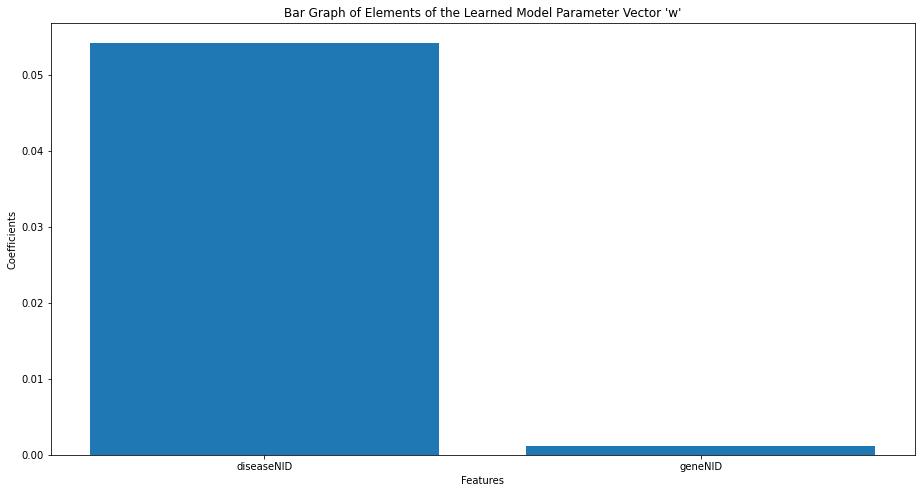

In [21]:
#Now that we have the best hyperparameter, we retrain the model:
clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')
clf.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
#f1 = f1_score(y_test, y_test_pred)
#recall = recall_score(y_test, y_test_pred)
#precision = precision_score(y_test, y_test_pred)

#Visualizing the elements of the learned model parameter vector w with a bar plot:
#print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

print("Our learned model parameter vector 'w': ", abs(clf.coef_[0]))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
labels = ['diseaseNID', 'geneNID']
coefficients = abs(clf.coef_[0])
ax.bar(labels, coefficients)
plt.title("Bar Graph of Elements of the Learned Model Parameter Vector 'w'")
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()